# Written (Trial) Exam for 01002/01004 Mathematics 1b, Suggested Solutions

By shsp@dtu.dk, 05/05-2024

In [18]:
from sympy import *
from dtumathtools import *

init_printing()

## Exercise 1

We are given the two partial derivatives, so the following gradient, of a function $f:\mathbb R^2\to\mathbb R$:

In [19]:
x, y = symbols("x y")
fx = 6 * x - 6 * y
fy = 6 * y**2 - 6 * x
fx, fy

### (a)

Setting them equal to zero and solving for all solutions results in all stationary points:

In [20]:
statpt = solve([Eq(fx, 0), Eq(fy, 0)])
statpt

So, $f$ has the two stationary points, $(0,0)$ and $(1,1)$.

### (b)

Second-order partial derivatives:

In [21]:
fxx = diff(fx, x)
fxy = diff(fx, y)
fyx = diff(fy, x)
fyy = diff(fy, y)
fxx, fxy, fyx, fyy

We see that the two partial mixed double derivatives are equal. Since $f$ also is defined on all of $\mathbb R^2$, then $f$ is two-time differentiable (smooth).

The Hessian matrix $H_f(x,y)$:

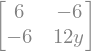

In [22]:
H = Lambda(tuple([x, y]), Matrix([[fxx, fxy], [fyx, fyy]]))
H(x, y)

With no boundary given, extrema can only be found at stationary points or execptional points. Since $f$ is smooth and defined on all of $\mathbb R^2$, there are no exceptional points. So, we investigate the eigenvalues of the Hessian matrix at the stationary points:

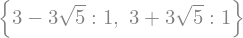

In [23]:
H(0, 0).eigenvals()

The eigenvalues have different signs, so according to Theorem 5.2.4, $(0,0)$ is a saddel point.

In [31]:
lambdas = H(1, 1).eigenvals(multiple=True)
lambdas[0].evalf(), lambdas[1].evalf()

The eigenvalues are both positive, indicating a local minimum at $(1,1)$.

There are no more possible extremum points, so $f$ has no maximum.

### (c)

We are now informed that $f(0,0)=1$. For the 2nd-degree Taylor approximating expanded from $x_0=(0,0)$, we need the 1st-order and 2nd-order partial derivatives evaluated at $(0,0)$:

$$\frac{\partial f(0,0)}{\partial x}=0,\frac{\partial f(0,0)}{\partial y}=0,\frac{\partial^2 f(0,0)}{\partial x^2}=6,\frac{\partial^2 f(0,0)}{\partial y^2}=0,\frac{\partial^2 f(0,0)}{\partial x\partial y}=\frac{\partial^2 f(0,0)}{\partial y\partial x}=-6$$

Setting up the approximation:

$$P_2(x,y)=f(0,0)+\frac{\partial f(0,0)}{\partial x}(x-0)+\frac{\partial f(0,0)}{\partial y}(y-0)+\frac12\frac{\partial^2 f(0,0)}{\partial x^2}(x-0)^2+\frac12\frac{\partial^2 f(0,0)}{\partial y^2}(x-0)^2+\frac{\partial^2 f(0,0)}{\partial x\partial y}(x-0)(y-0)$$
$$=1+0+0+\frac126x^2+0-6xy$$
$$=3x^2-6xy+1$$

## Exercise 2

A function $f:\mathbb R\to \mathbb R$ is given by $f(0)=1$ and $f(x)=\sin(x)/x$ when $x\neq 0$.

### (a)

3rd-degree Taylor polynomial of $\sin(x)$ expanded from $x_0=0$:

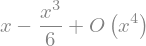

In [32]:
sin(x).series(x, 0, 4)

So, the Taylor polynomial of degree 3 is $P_3(x)=x-\frac{x^3}6.$

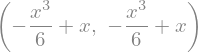

In [35]:
P3 = x - x**3 / 6
P3, sin(x).series(x, 0, 4).removeO()

### (b)

The Taylor expansion (Taylor's limit formula) of $\sin(x)$ is:

$$\sin(x)=x-\frac{x^3}6+\varepsilon(x)x^3$$

where $\varepsilon(x)$ is an epsilon function.

We find the following limit value:

$$\lim_{x\to 0}\frac{\sin(x)}{x}=\lim_{x\to 0}\frac{x-\frac{x^3}6+\varepsilon(x)x^3}{x}=\lim_{x\to 0}\left(1-\frac{x^2}6+\varepsilon(x)x^2\right)=1.$$

### (c)

According to remark to theorem 3.1.1 in the note, $f$ is continuous in all points in the interval $\mathbb R \setminus \{0\}$. In (b) we showed that $\sin(x)/x$ converges towards $1$ for $x\to 0$. By the given definition, $f(0)=1$, and thus $f(x)\to f(0)$ for $x\to 0$, so f is also continuous in $x=0$.

### (d)

Defining the function for $]0,1]:$

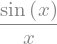

In [36]:
def f(x):
    return sin(x) / x


f(x)

Computing a decimal approximation of $\int_0^1f(x)\,\mathrm dx$ using SymPy:

In [37]:
integrate(f(x), (x, 0, 1)).evalf()

### (e)

We will compute a Riemann sum as an approximation of the area under the graph of $f$ by subdividing the interval $[0,1]$ into $J=30$ subintervals with equal widths of $\Delta x_j=1/30$ and finding the right-sum. For such a sum, $x_j=j/J$ for $j=1,\ldots,J$: 

In [38]:
j = symbols("j")

delta_xj = 1 / 30
J = 30
xj = j / J

Sum(f(xj) * delta_xj, (j, 1, 30)).evalf()

Alternatively, using at for loop:

In [44]:
riemann_sum = 0
N = 30
for i in range(1, N + 1):
    riemann_sum += sin(i / N) / (i / N) * 1 / N

riemann_sum

### (f)

Computing $\int_0^1P_3(x)\,\mathrm dx$:

In [45]:
integrate(P3, (x, 0, 1)).evalf()

This approximation of the integral is worse than the approximation using a Riemann sum in the previous question, since a Taylor polynomial of $\sin(x)$ does not approximate $f$ very well. However, it would have been sensible to use: 

In [46]:
integrate(P3 / x, (x, 0, 1)).evalf()

## Exercise 3

Given matrix $C_t$ where $t\in\mathbb R$:

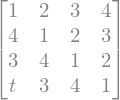

In [48]:
t = symbols("t")
Ct = Matrix([[1, 2, 3, 4], [4, 1, 2, 3], [3, 4, 1, 2], [t, 3, 4, 1]])
Ct

### (a)

The unitary matrix $C_t^*$ is the transposed and conjugated matrix. Since $t\in\mathbb R$, there are no non-real numbers involved, and the conjugation can be ignored. The unitary matrix is thus the transposed matrix, $C_t^*=C_t^T$:

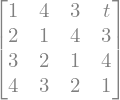

In [49]:
Ct_uni = Ct.T
Ct_uni

$C_t$ is a normal matrix if $C_tC_t^*=C_t^*C_t,$ so if $C_tC_t^T=C_t^TC_t$, which is solved for $t$:

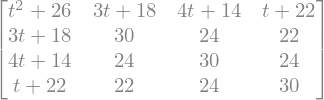

In [50]:
Ct_uni * Ct

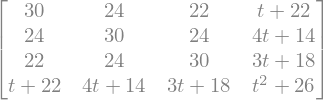

In [51]:
Ct * Ct_uni

In [52]:
solve(Eq(Ct * Ct_uni, Ct_uni * Ct))

So, only for $t=2$ is $C_t$ normal.

### (b) and (c)

Defining $A=C_2$:

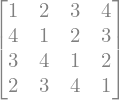

In [53]:
A = Ct.subs(t, 2)
A

Given eigenvectors:

In [54]:
v1 = Matrix([1, 1, 1, 1])
v2 = Matrix([1, I, -1, -I])

Treating $A$ as a mapping matrix and mapping the eigenvectors:

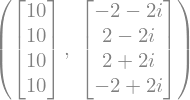

In [55]:
A * v1, A * v2

From this we read the scaling factors, which are the eigenvalues corresponding to the given eigenvectors, to be $\lambda_1=10$ and $\lambda_2=-2-2i$: 

In [56]:
lambda1 = 10
lambda2 = -2 - 2 * I

Check:

In [57]:
A * v1 == lambda1 * v1, A * v2 == simplify(lambda2 * v2)

(True, True)

### (d)

Orthogonality is equivalent to an inner product of zero. The inner product of two complex vectors from $\mathbb C^4$ is a dot product with one vector complex conjugated, $\langle v_1,v_2\rangle = v_1\cdot \overline{v_2}$:

In [59]:
v1.dot(v2.conjugate())

We conclude that they are orthogonal, $v_1\perp v_2$.

### (e)

The norm is the root of the inner product of a vector with itself, e.g. $||v_1||=\sqrt{<v_1,v_1>}$. Since $v_1\in\mathbb R^4$ we can use the usual dot product without conjugation as the inner product for that one. We compute the norms of both eigenvectors:

In [60]:
sqrt(v1.dot(v1))

In [61]:
sqrt(v2.dot(v2.conjugate()))

As their norms are not 1, they are not normalized. The list $v_1,v_2$ is hence orthogonal but *not* orthonormal.

## Exercise 4

Given quadratic form $q:\mathbb R^2\to\mathbb R$:

In [62]:
def q(x1, x2):
    return 2 * x1**2 - 2 * x1 * x2 + 2 * x2**2 - 4 * x1 + 2 * x2 + 2


x1, x2 = symbols("x1,x2")
q(x1, x2)

### (a)

For rewriting to matrix form $q(x_1,x_2)=x^TAx+x^Tb+c$, then $A$, $b$ and $c$ can be as follows:

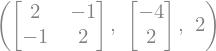

In [63]:
A = Matrix([[2, -1], [-1, 2]])
b = Matrix([-4, 2])
c = 2
A, b, c

Checking:

In [64]:
x = Matrix([x1, x2])

simplify(list(x.T * A * x + x.T * b)[0] + c)

In [65]:
simplify(list(x.T * A * x + x.T * b)[0] + c) == q(x1, x2)

True

### (b)

We will now reduce the quadratic form $q$ to new form called $q_1$ without "mixed double terms" by changing the basis using an orthogonal change-of-basis matrix $Q$ that changes from new to original coordinates, meaning $\tilde x=Q^Tx$. Such $Q$ consists of orthonormalized eigenvectors of $A$ as columns.

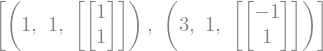

In [66]:
A.eigenvects()

$A$ has the two linearly independent eigenvectors:

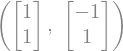

In [67]:
v1 = Matrix([1, 1])
v2 = Matrix([-1, 1])
v1, v2

Also, $A$ has a corresponding eigenvalue to each eigenvector:

In [68]:
lambda1 = 1
lambda2 = 3
lambda1, lambda2

Since $A$ is symmetric, then $v_1$ and $v_2$ are orthogonal, according to Theorem xx. We normalize them:

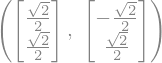

In [69]:
q1 = v1.normalized()
q2 = v2.normalized()
q1, q2

A change-of-basis matrix $Q$ is then:

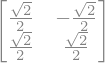

In [70]:
Q = Matrix.hstack(q1, q2)
Q

This can also be found directly by

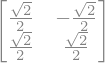

In [75]:
Qmat, Lamda = A.diagonalize(normalize=True)
Qmat

### (c)

The new coordinates $\tilde x$ are in code denoted by $k$:

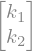

In [76]:
k1, k2 = symbols("k1 k2")
k = Matrix([k1, k2])
k

In the new coordinates, the squared terms have coefficients equal to the eigenvalues of $A$ that correspond to the eigenvectors in $Q$, which were found above, in the same order. We set up the new form $q_1$ in the new coordinates, where the original linear terms from $x^Tb$ are changed to the new basis by performing $\tilde x^TQ^Tb$:

In [77]:
q1 = lambda1 * k1**2 + lambda2 * k2**2 + list(k.T * Q.T * b)[0] + c
q1

Check:

In [78]:
simplify(list(k.T * Q.T * A * Q * k + k.T * Q.T * b)[0] + c)

Factorizing by completing the square gives us the following suggestions to the constants:

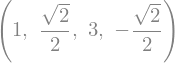

In [79]:
alpha = 1
gamma = sqrt(2) / 2
beta = 3
delta = -sqrt(2) / 2
alpha, gamma, beta, delta

Setting up the suggested factorized form of $q_1$ to see if it fits:

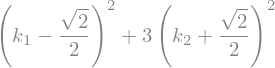

In [80]:
q1_fact = (
    alpha * (k1 - gamma) ** 2
    - alpha * gamma**2
    + beta * (k2 - delta) ** 2
    - beta * delta**2
    + 2
)
q1_fact

In [81]:
expand(q1_fact)

In [82]:
expand(q1_fact) == q1

True

We see that the above listed four constants give us the wanted factorized form from the problem text, which is a correct factorization of $q_1$.

### (d)

We are informed that $q_1$ in the new coordinates has a stationary point at $(\gamma,\delta)$ with the values of the constants found in (c):

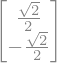

In [83]:
k_statpt = Matrix([gamma, delta])
k_statpt

The point written in the original coordinates:

In [84]:
x_statpt = Q * k_statpt
x_statpt

The Hessian matrix of $q$ is by definition $H_q=2A$. Since the eigenvalues of $A$ are positive at all points, then the eigenvalues of $H_q$ are also positive at all points. Thus, also positive at any stationary points. According to Theorem 5.2.4, if the point $(1,0)$ is a stationary point, then two positive eigenvalues indicate that it is a local minimum.

## Exercise 5

Given parametrization of a solid region, for $u\in[0,1],v\in[0,1],w\in[0,\pi/2]$:

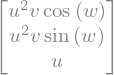

In [85]:
def r(u, v, w):
    return Matrix([v * u**2 * cos(w), v * u**2 * sin(w), u])


u, v, w = symbols("u v w")
r(u, v, w)

We note that $r$ is injective within the interior of the given parameter intervals.

### (a)

Plotting the region:

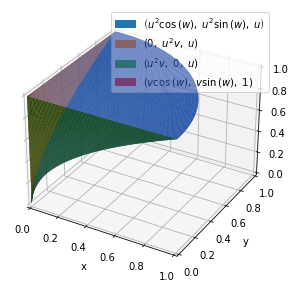

In [86]:
from sympy.plotting import *

pa = dtuplot.plot3d_parametric_surface(
    *r(u, v, w).subs(v, 1), (u, 0, 1), (w, 0, pi / 2), show=False
)
pb = dtuplot.plot3d_parametric_surface(
    *r(u, v, w).subs(w, pi / 2), (u, 0, 1), (v, 0, 1), show=False
)
pc = dtuplot.plot3d_parametric_surface(
    *r(u, v, w).subs(w, 0), (u, 0, 1), (v, 0, 1), show=False
)
pd = dtuplot.plot3d_parametric_surface(
    *r(u, v, w).subs(u, 1),
    (v, 0, 1),
    (w, 0, pi / 2),
    {"color": "royalblue", "alpha": 0.7},
    show=False
)
(pa + pb + pc + pd).show()

The Jacobian matrix:

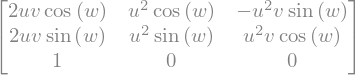

In [87]:
Jac_mat = Matrix.hstack(diff(r(u, v, w), u), diff(
    r(u, v, w), v), diff(r(u, v, w), w))
Jac_mat

The Jacobian determinant:

In [88]:
Jac_det = simplify(Jac_mat.det())
Jac_det

### (b)

Given vector field:

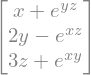

In [89]:
x, y, z = symbols("x y z")
V = Matrix([x + exp(y * z), 2 * y - exp(x * z), 3 * z + exp(x * y)])
V

Given function:

In [91]:
f = Lambda(tuple((x, y, z)), diff(V[0], x) + diff(V[1], y) + diff(V[2], z))
f(x, y, z)

### (c)

We see above that $f$ is a constant and thus continuous function.
A continuous function satisfying the conditions (I) and (II) on page 140,are guaranteed to be Riemann integrable, according to the remark after definition 6.3.1.

### (d)

Since $r$ is injective and since the Jacobian determinant is non-zero within the interior of the parameter intervals, then we can compute the volume integral of $f$ over the solid region by integrating along the axis-parallel $u,v,w$ region and adjusted by the Jacobian function, which is the absolute value of the Jacobian determinant in this case:

In [92]:
integrate(f(*r(u, v, w)) * abs(Jac_det), (u, 0, 1), (v, 0, 1), (w, 0, pi / 2))

## Exercise 6

Given elevated surface: $G=\{(x,y,h(x,y))|0\leq x\leq2,0\leq y\leq1\}$, where $h$ is given as:

In [93]:
def h(x, y):
    return 2 * x - y + 1


x, y = symbols("x y")
h(x, y)

### (a)

Parametrisation of $G$:

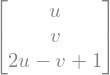

In [94]:
r = Lambda(tuple((u, v)), Matrix([u, v, h(u, v)]))

u, v = symbols("u v")
r(u, v)

wich parameter intervals $u\in[0,2],v\in[0,1]$. This parametrization is injective in the interior. Plot:

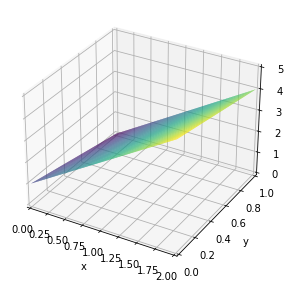

In [95]:
plot3d_parametric_surface(*r(u, v), (u, 0, 2), (v, 0, 1))

Normal vector to the surface:

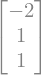

In [96]:
N = diff(r(u, v), u).cross(diff(r(u, v), v))
N

The Jacobian function in case of surface integrals is the length (norm) of the normal vector:

In [97]:
Jac = N.norm()
Jac

The area of $G$ is found as a surface integral of the scalar 1 over the surface. Since $r$ is injective and the Jacobian function is non-zero on the interior, then we will carry out the surface integral along $u$ and $v$ and adjust by the Jacobian:

In [98]:
integrate(Jac, (u, 0, 2), (v, 0, 1))

### (b)

The region is now cut in two by a vertical plane through the points $(0,1)$ and $(2,0)$. This cuts the region in the $(x,y)$ plane into two triangles, of which we denote the "lower" triangle by $\Gamma_1$. Parametrized, where $u\in[0,2],v\in[0,1]$:

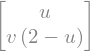

In [99]:
s = Matrix([u, (2 - u) * v])
s

The elevated surface above $\Gamma_1$ is denoted $G_1$. A parametrization of $G_1$, where $u\in[0,2],v\in[0,1]$:

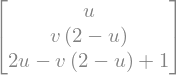

In [100]:
r1 = Lambda(tuple((u, v)), Matrix([*s, h(*s)]))
r1(u, v)

Plot:

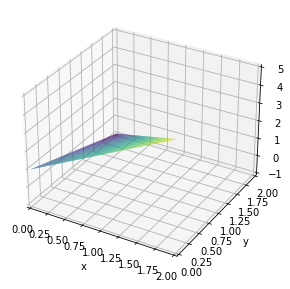

In [101]:
plot3d_parametric_surface(*r1(u, v), (u, 0, 2), (v, 0, 1))

Normal vector:

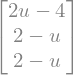

In [102]:
N1 = simplify(diff(r1(u, v), u).cross(diff(r1(u, v), v)))
N1

The Jacobian function:

In [103]:
simplify(N1.norm())

Since $u\leq2$, we simplify to:

In [104]:
Jac1 = -sqrt(6) * (u - 2)
Jac1

### (c)

Given function

In [105]:
def f(x, y, z):
    return x + y + z - 1


f(x, y, z)

Surface integral of $f$ over $G_1$ is performed over the parameter region since $r_1$ is injective and the Jacobian function non-zero on the interior of $\Gamma_1$:

In [106]:
integrate(f(*r1(u, v)) * Jac1, (u, 0, 2), (v, 0, 1))